#### ANN Model for Binary Classification 

1) Activation function used in hidden layer  - relu, leakyrelu<br>
2) Activation function used in output layer  - sigmoid<br>
3) Optimizer - adam, rmsprop, sgd<br>
4) Loss Function - binary_crossentropy<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(302, 14)

In [ ]:
x = df.drop('output',axis=1)
y = df['output']
print(x.shape)
print(y.shape)

(302, 13)
(302,)


In [ ]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
x.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [ ]:
y.sample(10)

187    0
55     1
38     1
23     1
297    0
72     1
109    1
31     1
246    0
186    0
Name: output, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 13)
(76, 13)
(226,)
(76,)


#### Build NN Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
m1 = Sequential()
m1.add(Dense(40,activation='relu',input_dim=13))
m1.add(Dense(20,activation='relu'))
m1.add(Dense(13,activation='relu'))
m1.add(Dense(1,activation='sigmoid'))

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
h1 = m1.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
8/8 [==============================] - 5s 187ms/step - loss: 0.8076 - accuracy: 0.6150 - val_loss: 0.8914 - val_accuracy: 0.5132
Epoch 2/20
8/8 [==============================] - 0s 30ms/step - loss: 0.7244 - accuracy: 0.5575 - val_loss: 0.6646 - val_accuracy: 0.6184
Epoch 3/20
8/8 [==============================] - 0s 31ms/step - loss: 0.6453 - accuracy: 0.6504 - val_loss: 0.7484 - val_accuracy: 0.5132
Epoch 4/20
8/8 [==============================] - 0s 29ms/step - loss: 0.6306 - accuracy: 0.5973 - val_loss: 0.6750 - val_accuracy: 0.5921
Epoch 5/20
8/8 [==============================] - 0s 36ms/step - loss: 0.6494 - accuracy: 0.6283 - val_loss: 0.6946 - val_accuracy: 0.5132
Epoch 6/20
8/8 [==============================] - 0s 30ms/step - loss: 0.6120 - accuracy: 0.6681 - val_loss: 0.6331 - val_accuracy: 0.7105
Epoch 7/20
8/8 [==============================] - 0s 32ms/step - loss: 0.5952 - accuracy: 0.6991 - val_loss: 0.6290 - val_accuracy: 0.7237
Epoch 8/20
8/8 [==========

In [ ]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
15,0.590187,0.699115,0.617924,0.684211,15
16,0.559442,0.690265,0.616781,0.684211,16
17,0.556371,0.707965,0.611827,0.697368,17
18,0.556886,0.707965,0.624204,0.618421,18
19,0.560360,0.685841,0.601569,0.723684,19


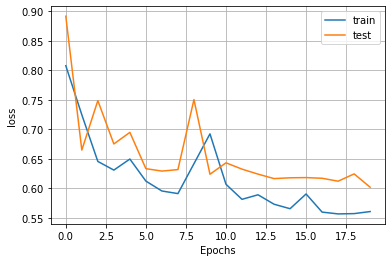

In [ ]:
plt.plot(r1['Epochs'],r1['loss'],label='train')
plt.plot(r1['Epochs'],r1['val_loss'],label='test')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

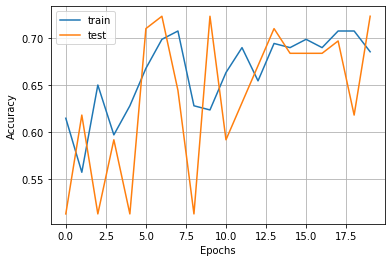

In [ ]:
plt.plot(r1['Epochs'],r1['accuracy'],label='train')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
ypred_m1 = m1.predict(x_test)
ypred_m1

array([[0.80619615],
       [0.54900676],
       [0.81151104],
       [0.6181812 ],
       [0.5115746 ],
       [0.2477408 ],
       [0.5285784 ],
       [0.41641647],
       [0.528886  ],
       [0.64957523],
       [0.359292  ],
       [0.7637791 ],
       [0.6918352 ],
       [0.57066834],
       [0.5140534 ],
       [0.3875546 ],
       [0.470774  ],
       [0.7305921 ],
       [0.5920207 ],
       [0.38060355],
       [0.4804515 ],
       [0.6335712 ],
       [0.7277561 ],
       [0.52352285],
       [0.41068596],
       [0.17960796],
       [0.20825249],
       [0.36708432],
       [0.14638188],
       [0.5096707 ],
       [0.47054505],
       [0.60921013],
       [0.73099667],
       [0.6732614 ],
       [0.3062538 ],
       [0.4360382 ],
       [0.4548773 ],
       [0.5563117 ],
       [0.62729645],
       [0.6781483 ],
       [0.27412644],
       [0.69698566],
       [0.6425175 ],
       [0.7466891 ],
       [0.37269324],
       [0.62132514],
       [0.30757365],
       [0.627

In [ ]:
ypred_res = [0 if i<0.5 else 1 for i in ypred_m1]
print(ypred_res)

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix(y_test,ypred_res)
print(cm)

[[24 13]
 [ 8 31]]


In [ ]:
print(classification_report(y_test,ypred_res))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70        37
           1       0.70      0.79      0.75        39

    accuracy                           0.72        76
   macro avg       0.73      0.72      0.72        76
weighted avg       0.73      0.72      0.72        76



### Model - 2

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 13)
(76, 13)
(226,)
(76,)


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
print(y_train1.shape)
print(y_test1.shape)

(226, 2)
(76, 2)


In [ ]:
y_train[:7].values

array([1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [ ]:
print(y_train1[:7])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


#### ANN Classification Architecture for Model-2

In [ ]:
m2 = Sequential()
m2.add(Dense(40,activation='relu',input_dim=13))
m2.add(Dense(20,activation='relu'))
m2.add(Dense(13,activation='relu'))
m2.add(Dense(2,activation='sigmoid'))

m2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
h2 = m2.fit(x_train,y_train1,epochs=20,validation_data=(x_test,y_test1))

Epoch 1/20
8/8 [==============================] - 2s 92ms/step - loss: 15.8535 - accuracy: 0.4469 - val_loss: 12.1878 - val_accuracy: 0.4868
Epoch 2/20
8/8 [==============================] - 0s 21ms/step - loss: 11.2301 - accuracy: 0.4469 - val_loss: 8.9577 - val_accuracy: 0.4868
Epoch 3/20
8/8 [==============================] - 0s 21ms/step - loss: 8.1088 - accuracy: 0.4469 - val_loss: 6.1816 - val_accuracy: 0.4868
Epoch 4/20
8/8 [==============================] - 0s 21ms/step - loss: 5.6130 - accuracy: 0.4469 - val_loss: 3.9345 - val_accuracy: 0.4868
Epoch 5/20
8/8 [==============================] - 0s 20ms/step - loss: 3.2436 - accuracy: 0.4469 - val_loss: 1.9978 - val_accuracy: 0.4868
Epoch 6/20
8/8 [==============================] - 0s 24ms/step - loss: 1.5444 - accuracy: 0.4204 - val_loss: 0.8595 - val_accuracy: 0.4474
Epoch 7/20
8/8 [==============================] - 0s 22ms/step - loss: 0.7479 - accuracy: 0.6106 - val_loss: 0.7243 - val_accuracy: 0.5658
Epoch 8/20
8/8 [========

In [ ]:
ypred_m2 = m2.predict(x_test)
ypred_m2

array([[0.17685246, 0.85694855],
       [0.37457448, 0.69025135],
       [0.18601248, 0.8407762 ],
       [0.32478303, 0.59652436],
       [0.42759275, 0.54009086],
       [0.79885983, 0.16336176],
       [0.37769306, 0.6858498 ],
       [0.57332814, 0.34801304],
       [0.4713762 , 0.42724597],
       [0.27656388, 0.7714567 ],
       [0.6533072 , 0.28451303],
       [0.17297167, 0.8466829 ],
       [0.29307967, 0.71729434],
       [0.3633674 , 0.59759885],
       [0.48092663, 0.4382624 ],
       [0.6025911 , 0.31870028],
       [0.50206476, 0.54624397],
       [0.21888342, 0.85084546],
       [0.29819182, 0.76264787],
       [0.5424359 , 0.46266747],
       [0.41131818, 0.6419402 ],
       [0.40400156, 0.5011363 ],
       [0.27598572, 0.63229394],
       [0.466186  , 0.47839582],
       [0.56114626, 0.39900059],
       [0.7155183 , 0.12419984],
       [0.7809509 , 0.14137271],
       [0.5783588 , 0.39151183],
       [0.83150995, 0.06527638],
       [0.41467592, 0.5614816 ],
       [0.

In [ ]:
# Method-1
ypred_m2_01 = []
for i in ypred_m2:
#     print('i[0]',i[0],'i[1]',i[1])
    if max(i[0],i[1]) ==i[0]:
        ypred_m2_01.append(0)
    else:
        ypred_m2_01.append(1)
print(ypred_m2_01)

[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]


In [ ]:
ypred_m2_res = [np.argmax(i) for i in ypred_m2]
print(ypred_m2_res)

[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]


In [ ]:
print(y_test1[:5])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
cm_m2 = confusion_matrix(y_test,ypred_m2_01)
print(cm_m2)
print(classification_report(y_test,ypred_m2_01))

[[23 14]
 [ 9 30]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        37
           1       0.68      0.77      0.72        39

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.69        76
weighted avg       0.70      0.70      0.70        76



In [ ]:
cm_m2 = confusion_matrix(y_test,ypred_m2_res)
print(cm_m2)
print(classification_report(y_test,ypred_m2_res))

[[23 14]
 [ 9 30]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        37
           1       0.68      0.77      0.72        39

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.69        76
weighted avg       0.70      0.70      0.70        76

